# Preprocessing of ParlaMint data

In [2]:
# Imports
import os
import xml.etree.ElementTree as ET
import re
import pandas as pd
import plotly.express as px
os.getcwd()

'c:\\Users\\beren\\OneDrive\\Documenten\\AAA Universiteit\\A Data Science\\Thesis'

## Get the XML files


In [3]:
# Folder path
path = r"c:\\Users\\beren\\OneDrive\\Documenten\\AAA Universiteit\\A Data Science\\Thesis\\Data_xml\\"

# Set directory
os.chdir(path)

# Print folder contents
os.listdir()

# Het volgende moet je zien als output, anders is de path verkeerd
# ['ParlaMint-BE.TEI',
#  'ParlaMint-BG.TEI',
#  'ParlaMint-CZ.TEI',
#  'ParlaMint-DK.TEI',
#  'ParlaMint-ES.TEI',
#  'ParlaMint-FR.TEI',
#  'ParlaMint-GB.TEI',
#  'ParlaMint-HR.TEI',
#  'ParlaMint-HU.TEI',
#  'ParlaMint-IS.TEI',
#  'ParlaMint-IT.TEI',
#  'ParlaMint-LT.TEI',
#  'ParlaMint-LV.TEI',
#  'ParlaMint-NL.TEI',
#  'ParlaMint-PL.TEI',
#  'ParlaMint-SI.TEI',
#  'ParlaMint-TR.TEI']

['ParlaMint-BE.TEI',
 'ParlaMint-BG.TEI',
 'ParlaMint-CZ.TEI',
 'ParlaMint-DK.TEI',
 'ParlaMint-ES.TEI',
 'ParlaMint-FR.TEI',
 'ParlaMint-GB.TEI',
 'ParlaMint-HR.TEI',
 'ParlaMint-HU.TEI',
 'ParlaMint-IS.TEI',
 'ParlaMint-IT.TEI',
 'ParlaMint-LT.TEI',
 'ParlaMint-LV.TEI',
 'ParlaMint-NL.TEI',
 'ParlaMint-PL.TEI',
 'ParlaMint-SI.TEI',
 'ParlaMint-TR.TEI']

In [ ]:
# open documenten vanuit file path
def read_xml(path):
    tree = ET.parse(path)
    
    root = tree.getroot()

    return root.attrib

In [4]:
# --------------------------------------------------------------------------------------
# Vereist list met folder van landen bv: ['ParlaMint-NL.TEI', "ParlaMint-BE.TEI"]
#
# ---Return list met dict [{Land1}, {Land 1}]---
#
# Voorbeeld voor land MET jaarfolders:
# item 1 --> 'land folder': [land xml] bv: 'ParlaMint-NL.TEI': ['ParlaMint-NL.xml']
# item rest --> 'ParlaMint-NL.TEI\\2014': ['ParlaMint-NL_2014-04-16-tweedekamer-2.xml', '...']
#
# Voorbeeld met land ZONDER jaarfolder:
# items (alle) --> {'ParlaMint-BG.TEI': ['ParlaMint-BG.xml', 'ParlaMint-BG_2014-10-27.xml', '...'}
#
# Ofwel len(dict) > 1 bij landen met jaarfolders, anders zit speciale file inbegrepen als eerste in dict
#
#  Path vinden met os.path.join(key, value[x])
# --------------------------------------------------------------------------------------

def get_xml_files(country_selection):
    country_return_list = []

    # loop door alle folders die hierboven zijn geprint
    for country in os.listdir():

        # filter op specifiek land (IN BOX 2)
        if country in country_selection:
            paths_dict = {}

            # ga door alle inhoud van de landfolder heen
            for root, dirs, files in os.walk(country):
                file_data = []
                
                # loop door files van een folder
                for file in files:

                    #filter alleen de xml files
                    if ".xml" in file and not "~" in file:
                        file_data.append(file)

                # filter onzin uit de dict voor makkelijkere processing later
                if not "Schema" in root:
                    paths_dict[root] = file_data

            country_return_list.append(paths_dict)
        
    return country_return_list

## Get text files

In [4]:
# --------------------------------------------------------------------------------------
# Vereist list met folder van landen bv: ['ParlaMint-NL.TEI', "ParlaMint-BE.TEI"]
#
# ---Return list met dict [{Land1}, {Land 1}]---
#
# Voorbeeld voor land MET jaarfolders:
# item 1 --> 'land folder': [land xml] bv: 'ParlaMint-NL.TEI': ['ParlaMint-NL.xml']
# item rest --> 'ParlaMint-NL.TEI\\2014': ['ParlaMint-NL_2014-04-16-tweedekamer-2.xml', '...']
#
# Voorbeeld met land ZONDER jaarfolder:
# items (alle) --> {'ParlaMint-BG.TEI': ['ParlaMint-BG.xml', 'ParlaMint-BG_2014-10-27.xml', '...'}
#
# Ofwel len(dict) > 1 bij landen met jaarfolders, anders zit speciale file inbegrepen als eerste in dict
#
#  Path vinden met os.path.join(key, value[x])
# --------------------------------------------------------------------------------------

# Folder path (diffrent from before as we go to .txt files)
path = r"c:\Users\beren\OneDrive\Documenten\AAA Universiteit\A Data Science\Thesis\Data_text\\"

# Set directory
os.chdir(path)

# Print folder contents
os.listdir()

def get_txt_files(country_selection):
    country_return_list = []

    # loop door alle folders die hierboven zijn geprint
    for country in os.listdir():
#         print(country)
        # filter op specifiek land (IN BOX 2)
        if country in country_selection:
            paths_dict = {}

            # ga door alle inhoud van de landfolder heen
            for root, dirs, files in os.walk(country):
                file_data = []
                
                # loop door files van een folder
                for file in files:

                    #filter alleen de xml files
                    if (".txt" in file or ".tsv" in file) and not "~" in file:
                        file_data.append(file)

                # filter onzin uit de dict voor makkelijkere processing later
                if not "Schema" in root:
                    paths_dict[root] = file_data

            country_return_list.append(paths_dict)
        
    return country_return_list

In [5]:
answer = get_txt_files(["ParlaMint-NL.txt"])
answer[0]["ParlaMint-NL.txt\\2014"][:5]

['ParlaMint-NL_2014-04-16-tweedekamer-2-meta.tsv',
 'ParlaMint-NL_2014-04-16-tweedekamer-2.txt',
 'ParlaMint-NL_2014-04-16-tweedekamer-3-meta.tsv',
 'ParlaMint-NL_2014-04-16-tweedekamer-3.txt',
 'ParlaMint-NL_2014-04-16-tweedekamer-5-meta.tsv']

In [5]:
def country_paths(country):
    selected_countries = get_txt_files([country])[0]
    return_list = []
    
    for key,value in selected_countries.items():
        for i in value:
            return_list.append(path + key + "\\" +i)

    return return_list[1:]

country_paths('ParlaMint-BE.txt')[:10]

['c:\\Users\\beren\\OneDrive\\Documenten\\AAA Universiteit\\A Data Science\\Thesis\\Data_text\\\\ParlaMint-BE.txt\\2014\\ParlaMint-BE_2014-06-19-54-plenair-ip001x-meta.tsv',
 'c:\\Users\\beren\\OneDrive\\Documenten\\AAA Universiteit\\A Data Science\\Thesis\\Data_text\\\\ParlaMint-BE.txt\\2014\\ParlaMint-BE_2014-06-19-54-plenair-ip001x.txt',
 'c:\\Users\\beren\\OneDrive\\Documenten\\AAA Universiteit\\A Data Science\\Thesis\\Data_text\\\\ParlaMint-BE.txt\\2014\\ParlaMint-BE_2014-06-30-54-plenair-ip002x-meta.tsv',
 'c:\\Users\\beren\\OneDrive\\Documenten\\AAA Universiteit\\A Data Science\\Thesis\\Data_text\\\\ParlaMint-BE.txt\\2014\\ParlaMint-BE_2014-06-30-54-plenair-ip002x.txt',
 'c:\\Users\\beren\\OneDrive\\Documenten\\AAA Universiteit\\A Data Science\\Thesis\\Data_text\\\\ParlaMint-BE.txt\\2014\\ParlaMint-BE_2014-07-17-54-commissie-ic001x-meta.tsv',
 'c:\\Users\\beren\\OneDrive\\Documenten\\AAA Universiteit\\A Data Science\\Thesis\\Data_text\\\\ParlaMint-BE.txt\\2014\\ParlaMint-BE_2014

In [8]:
#list to dict
def convert(lst):   
    return {lst[i]: lst[i+1] for i in range(0, len(lst) -1)}
len(convert(country_paths('ParlaMint-HU.txt')))

385

In [6]:

%%time
def countryDF(path):
    df_list = []

    for i in range(0, len(country_paths(path)) - 1, 2):
#         print(i,country_paths(path)[i],country_paths(path)[i + 1])
        columns = ["ID","Title","From","To","House","Term","Session","Meeting","Sitting","Agenda","Subcorpus","Speaker_role","Speaker_type","Speaker_party","Speaker_party_name","Party_status","Speaker_name","Speaker_gender","Speaker_birth"]   
        dfmeta = pd.read_csv(country_paths(path)[i], sep = "	", names=columns , skiprows=1)

        dftext = pd.read_csv(country_paths(path)[i + 1], sep = "	", header=None, names= ["ID", "Text"])
        df1 = pd.merge(dftext, dfmeta, on='ID', how="outer")

        df_list.append(df1)
#         print(len(country_paths(path)))
    return pd.concat(df_list, axis=0)

# countryDF("ParlaMint-NL.txt")

Wall time: 0 ns


In [8]:
# #Create dataframe for each country
BE = countryDF("ParlaMint-BE.txt")
BG = countryDF("ParlaMint-BG.txt")
# CZ = countryDF("ParlaMint-CZ.txt") # werkt niet? Too many columns specified
DK = countryDF("ParlaMint-DK.txt")
ES = countryDF("ParlaMint-ES.txt")
FR = countryDF("ParlaMint-FR.txt")
GB = countryDF("ParlaMint-GB.txt")
HR = countryDF("ParlaMint-HR.txt")
HU = countryDF("ParlaMint-HU.txt")
IS = countryDF("ParlaMint-IS.txt")
IT = countryDF("ParlaMint-IT.txt")
LT = countryDF("ParlaMint-LT.txt")
LV = countryDF("ParlaMint-LV.txt")
NL = countryDF("ParlaMint-NL.txt")
PL = countryDF("ParlaMint-PL.txt")
SI = countryDF("ParlaMint-SI.txt")
#TR = countryDF("ParlaMint-TR.txt") # werkt niet: ParserError: Error tokenizing data.

In [9]:
BE.to_pickle("BE.pkl")
BG.to_pickle("BG.pkl")
#CZ.to_pickle("CZ.pkl")
DK.to_pickle("DK.pkl")
ES.to_pickle("ES.pkl")
FR.to_pickle("FR.pkl")
GB.to_pickle("GB.pkl")
HR.to_pickle("HR.pkl")
IS.to_pickle("IS.pkl")
IT.to_pickle("IT.pkl")
LT.to_pickle("LT.pkl")
LV.to_pickle("LV.pkl")
NL.to_pickle("NL.pkl")
PL.to_pickle("PL.pkl")
SI.to_pickle("SI.pkl")
HU.to_pickle("HU.pkl")
# TR.to_pickle("TR.pkl")

In [10]:
BE = pd.read_pickle("BE.pkl")
BG = pd.read_pickle("BG.pkl")
#CZ = pd.read_pickle("CZ.pkl")
DK = pd.read_pickle("DK.pkl")
ES = pd.read_pickle("ES.pkl")
FR = pd.read_pickle("FR.pkl")
GB = pd.read_pickle("GB.pkl")
HR = pd.read_pickle("HR.pkl")
IS = pd.read_pickle("IS.pkl")
IT = pd.read_pickle("IT.pkl")
LT = pd.read_pickle("LT.pkl")
LV = pd.read_pickle("LV.pkl")
NL = pd.read_pickle("NL.pkl")
PL = pd.read_pickle("PL.pkl")
SI = pd.read_pickle("SI.pkl")
HU = pd.read_pickle("HU.pkl")
# TR = pd.read_pickle("TR.pkl")

In [11]:
dfs = [BE,BG,DK,ES,FR,GB,HR,IS,IT,LT,LV,NL,PL,SI]

for i in dfs:
    print(i.describe())

                Term  Session  Sitting  Agenda
count  148425.000000      0.0      0.0     0.0
mean       54.205457      NaN      NaN     NaN
std         0.404037      NaN      NaN     NaN
min        54.000000      NaN      NaN     NaN
25%        54.000000      NaN      NaN     NaN
50%        54.000000      NaN      NaN     NaN
75%        54.000000      NaN      NaN     NaN
max        55.000000      NaN      NaN     NaN
       House           Term        Session        Meeting  Sitting  Agenda
count    0.0  146351.000000  146351.000000  146351.000000      0.0     0.0
mean     NaN      43.578131       4.555917     148.915566      NaN     NaN
std      NaN       0.493860       2.382751     105.697272      NaN     NaN
min      NaN      43.000000       1.000000       1.000000      NaN     NaN
25%      NaN      43.000000       3.000000      56.000000      NaN     NaN
50%      NaN      44.000000       4.000000     139.000000      NaN     NaN
75%      NaN      44.000000       6.000000     224.0

In [14]:
NL

,ID,Text,Title,From,To,House,Term,Session,Meeting,Sitting,Agenda,Subcorpus,Speaker_role,Speaker_type,Speaker_party,Speaker_party_name,Party_status,Speaker_name,Speaker_gender,Speaker_birth
0,ParlaMint-NL_2014-04-16-tweedekamer-2.u1,Inmiddels zijn voldoende leden aanwezig die oo...,Report of the meeting of the Dutch Lower House...,2014-04-16,2014-04-16,Lower house,28-lower,2,76,NaN,NaN,Reference,Chairperson,MP,VVD,Volkspartij voor Vrijheid en Democratie,Coalition,"van Miltenburg, Anouchka",F,-
1,ParlaMint-NL_2014-04-16-tweedekamer-2.u2,Voorzitter. Ik dien de volgende motie in. [[Mo...,Report of the meeting of the Dutch Lower House...,2014-04-16,2014-04-16,Lower house,28-lower,2,76,NaN,NaN,Reference,Regular,MP,PVV,Partij voor de Vrijheid,Opposition,"Agema, Fleur",F,-
2,ParlaMint-NL_2014-04-16-tweedekamer-2.u3,Voorzitter. Ik dien de volgende moties in. [[M...,Report of the meeting of the Dutch Lower House...,2014-04-16,2014-04-16,Lower house,28-lower,2,76,NaN,NaN,Reference,Regular,MP,50PLUS,50PLUS,Opposition,"Baay-Timmerman, Martine",F,-
3,ParlaMint-NL_2014-04-16-tweedekamer-2.u4,Voorzitter. Ik zal reageren op de ingediende m...,Report of the meeting of the Dutch Lower House...,2014-04-16,2014-04-16,Lower house,28-lower,2,76,NaN,NaN,Reference,Regular,notMP,PvdA,Partij van de Arbeid,Coalition,"van Rijn, Martin",M,-
4,ParlaMint-NL_2014-04-16-tweedekamer-2.u5,Dat was dus precies mijn punt niet. Natuurlijk...,Report of the meeting of the Dutch Lower House...,2014-04-16,2014-04-16,Lower house,28-lower,2,76,NaN,NaN,Reference,Regular,MP,PVV,Partij voor de Vrijheid,Opposition,"Agema, Fleur",F,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,ParlaMint-NL_2020-11-03-eerstekamer-9.u183,Ja.,Report of the meeting of the Dutch Upper House...,2020-11-03,2020-11-03,Upper house,36-upper,9,8,NaN,NaN,COVID,Regular,MP,FvD,Forum voor Democratie,Opposition,"Otten, Henk",M,-
183,ParlaMint-NL_2020-11-03-eerstekamer-9.u184,Wenst een van de overige leden nog het woord t...,Report of the meeting of the Dutch Upper House...,2020-11-03,2020-11-03,Upper house,36-upper,9,8,NaN,NaN,COVID,Chairperson,MP,VVD,Volkspartij voor Vrijheid en Democratie,Coalition,"Bruijn, Jan Anthonie",M,-
184,ParlaMint-NL_2020-11-03-eerstekamer-9.u185,De aangepaste motie van de heer Schalk laat ik...,Report of the meeting of the Dutch Upper House...,2020-11-03,2020-11-03,Upper house,36-upper,9,8,NaN,NaN,COVID,Regular,MP,VVD,Volkspartij voor Vrijheid en Democratie,Coalition,"Blok, Stef",M,-
185,ParlaMint-NL_2020-11-03-eerstekamer-9.u186,"Dank u wel, minister.",Report of the meeting of the Dutch Upper House...,2020-11-03,2020-11-03,Upper house,36-upper,9,8,NaN,NaN,COVID,Chairperson,MP,VVD,Volkspartij voor Vrijheid en Democratie,Coalition,"Bruijn, Jan Anthonie",M,-


### Add 'country' variable and merge into one dataframe

In [12]:
BE['Country'] = 'BE'
BG['Country'] = 'BG'
#CZ['Country'] = 'CZ'
DK['Country'] = 'DK' 
ES['Country'] = 'ES' 
FR['Country'] = 'FR' 
GB['Country'] = 'GB' 
HR['Country'] = 'HR' 
IS['Country'] = 'IS' 
IT['Country'] = 'IT' 
LT['Country'] = 'LT' 
LV['Country'] = 'LV' 
NL['Country'] = 'NL' 
PL['Country'] = 'PL' 
SI['Country'] = 'SI' 
HU['Country'] = 'HU' 
# TR['Country'] = 'TR' 


In [13]:
# merge into one dataframe
dfs = [BE,BG,DK,ES,FR,GB,HR,IS,IT,LT,LV,NL,PL,SI]

merged = pd.concat(dfs)

In [14]:
merged.to_pickle('merged.pkl')

In [15]:
merged = pd.read_pickle('merged.pkl')

# Data Cleaning
1 - Remove all speaker roles from text, such as [voorzitter]

# Exploratory Data Analysis

In [34]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
plt.style.use('bmh')

### Basic visualisations
1 - Number of missing values per variable for each country  

2 - Text length; min-max-median-average  

3 - Variable distribution per country; subcorpus / speaker_role / speaker_type / speaker party / party_status / gender

In [17]:
#1 Number of missing values per variable for each country 
merged.set_index('Country').isna().sum(level=0)


c:\Users\beren\miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  


,ID,Text,Title,From,To,House,Term,Session,Meeting,Sitting,Agenda,Subcorpus,Speaker_role,Speaker_type,Speaker_party,Speaker_party_name,Party_status,Speaker_name,Speaker_gender,Speaker_birth
Country,,,,,,,,,,,,,,,,,,,,
BE,0,0,0,0,0,0,0,148425,0,148425,148425,0,0,0,26089,26089,29570,0,0,0
BG,0,0,0,0,0,146351,0,0,0,146351,146351,0,0,0,51478,51478,51498,0,0,0
DK,0,12141,12350,24491,24491,24491,24491,24491,24491,24491,24491,24491,24491,24491,24491,24491,24491,24491,24491,24491
ES,0,0,0,0,0,0,0,0,49919,49919,49919,0,0,0,337,337,403,0,0,0
FR,0,0,0,0,0,0,481603,0,481603,0,481603,0,0,0,56100,56100,465590,0,0,0
GB,0,0,0,0,0,0,0,552103,552103,552103,552103,0,0,0,1614,142,3218,0,0,0
HR,0,0,0,0,0,124496,0,0,124496,124496,124496,0,0,0,6286,6286,6286,0,0,0
IS,0,0,0,0,0,74132,0,0,0,74132,74132,0,0,0,708,708,853,0,0,0
IT,0,0,0,0,0,0,0,79373,79373,0,79373,0,0,0,3797,3797,18887,0,0,0


In [111]:
# total entries per country
merged.groupby('Country').count().sum(level=0)['ID']

c:\Users\beren\miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  


Country
BE    148425
BG    146351
DK     24491
ES     49919
FR    481603
GB    552103
HR    124496
IS     74132
IT     79373
LT    244835
LV    122136
NL    474964
PL    168630
SI     75122
Name: ID, dtype: int64

In [22]:
# calculate the percentage of missing values to total entries
na_country = merged.set_index('Country').isna().sum(level=0)
total_entries = merged.groupby('Country').count().sum(level=0)['ID']
total_entries = total_entries.to_frame()

#na_country = pd.merge(na_country, total_entries, left_index=True, right_index=True)

#na_country = na_country.div(total_entries, axis = 0)

c:\Users\beren\miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  
c:\Users\beren\miniconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,Text,Title,From,To,House,Term,Session,Meeting,Sitting,Agenda,Subcorpus,Speaker_role,Speaker_type,Speaker_party,Speaker_party_name,Party_status,Speaker_name,Speaker_gender,Speaker_birth
Country,,,,,,,,,,,,,,,,,,,,
BE,0,0,0,0,0,0,0,14842500,0,14842500,14842500,0,0,0,2608900,2608900,2957000,0,0,0
BG,0,0,0,0,0,14635100,0,0,0,14635100,14635100,0,0,0,5147800,5147800,5149800,0,0,0
DK,0,1214100,1235000,2449100,2449100,2449100,2449100,2449100,2449100,2449100,2449100,2449100,2449100,2449100,2449100,2449100,2449100,2449100,2449100,2449100
ES,0,0,0,0,0,0,0,0,4991900,4991900,4991900,0,0,0,33700,33700,40300,0,0,0
FR,0,0,0,0,0,0,48160300,0,48160300,0,48160300,0,0,0,5610000,5610000,46559000,0,0,0
GB,0,0,0,0,0,0,0,55210300,55210300,55210300,55210300,0,0,0,161400,14200,321800,0,0,0
HR,0,0,0,0,0,12449600,0,0,12449600,12449600,12449600,0,0,0,628600,628600,628600,0,0,0
IS,0,0,0,0,0,7413200,0,0,0,7413200,7413200,0,0,0,70800,70800,85300,0,0,0
IT,0,0,0,0,0,0,0,7937300,7937300,0,7937300,0,0,0,379700,379700,1888700,0,0,0


In [109]:
# Groupby by country
country = merged.groupby("Country")

# Summary statistic of all countries
country.describe().head()

Text_length                                                       \
              count         mean          std  min    25%    50%     75%   
Country                                                                    
BE         148425.0  1315.307078  2033.255581  1.0  184.0  741.0  1742.0   
BG         146351.0   900.110775  1665.461272  2.0   82.0  243.0  1021.0   
DK          12350.0     4.027692     0.498482  4.0    4.0    4.0     4.0   
ES          49919.0  1605.895651  3318.143425  3.0   94.0  240.0  1790.0   
FR         481603.0   408.363997   873.273469  1.0   34.0   73.0   416.0   

                   
              max  
Country            
BE        67256.0  
BG        58172.0  
DK           13.0  
ES       102911.0  
FR        68230.0

In [27]:
#2 Speech attributes
merged['Text_length'] = merged['Text'].str.len() # add length of texts as variable

In [ ]:
merged.groupby('Country')['Text_length'].min()

In [ ]:
merged.groupby('Country')['Text_length'].max()

In [ ]:
merged.groupby('Country')['Text_length'].mean()

In [ ]:
merged.groupby('Country')['Text_length'].median()

In [ ]:
print(merged['Text_length'].describe())
# plt.figure(figsize=(9, 8))
# sns.displot(merged['Text_length'], color='g', bins=10)
# plt.xlim(0, )

In [61]:
#3 Variable distribution per country 
list(set(merged.dtypes.tolist()))
merged_num = merged.select_dtypes(include = ['float64'])
merged_num.head()
#merged_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


,Text_length
0,1036.0
1,1090.0
2,802.0
3,3810.0
4,164.0


<AxesSubplot:>

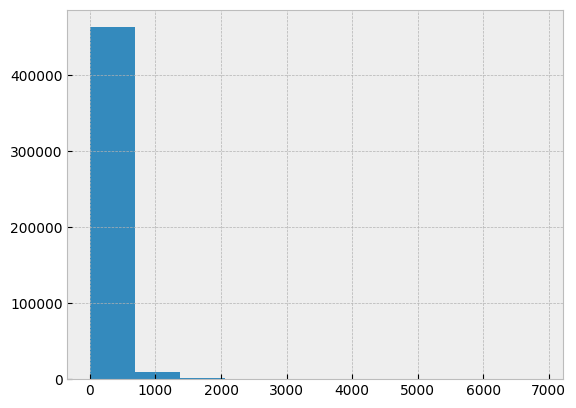

In [ ]:
# split into words and count words
NL['Words'] = NL['Text'].str.split()
NL['N_words'] = NL['Words'].str.len()


<AxesSubplot:>

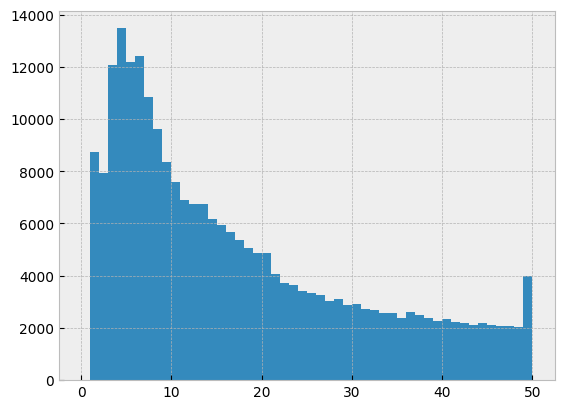

In [105]:
NL['N_words'].hist(range=[0,50], bins=50)

In [110]:
gender = NL.groupby('Speaker_gender')

In [ ]:
plt.figure(figsize=(15,10))
gender.max().sort_values(ascending=False)['N_words'].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Speaker_gender")
plt.ylabel("N_words")
plt.show()

### External datasets
-add birthday of all speakers so we can calculate age
-Speaker age per country; min-max-median-average

### Complex visualisations
1 - Words that most often occur
2 - Wordcloud
3 - Correlations

In [118]:
text = NL['Text'].str.cat(sep=' ') #combine all text into one variable

In [121]:
!pip install nltk

In [128]:
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('dutch')

In [130]:
list = ['minister', 'we', 'gaat', 'vraag', 'vind']
for i in list:
    stopwords.append(i)

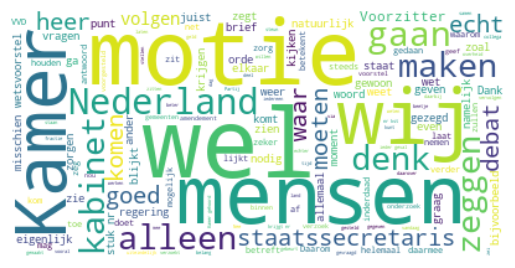

In [131]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()